Image Segmentation using kmeans algorithm


In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import cv2

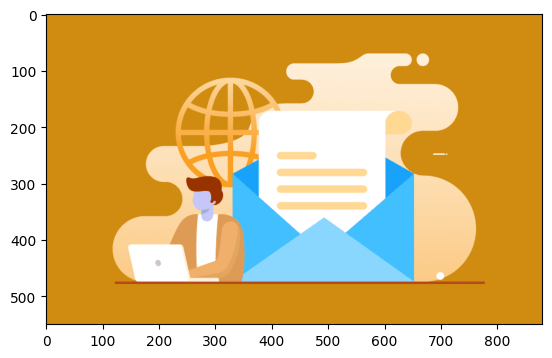

In [3]:
img=cv2.imread("sample.png",cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [4]:
print(img.shape)

(550, 880, 3)


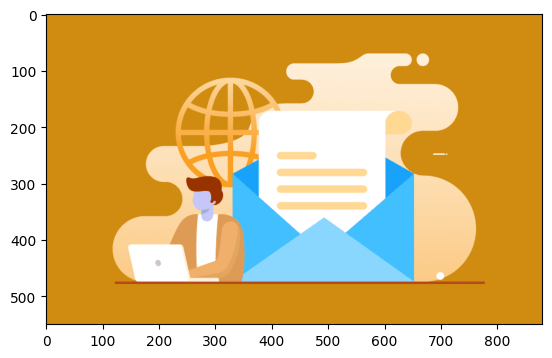

In [8]:
#converting 
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [10]:
#flatterning 
pixel_values=img.reshape((-1,3))

pixel_values=np.float32(pixel_values)

In [11]:
print(pixel_values.shape)

(484000, 3)


In [12]:
#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2 )


In [13]:
#number of clusters
K=3
_, labels, (centers)=cv2.kmeans(pixel_values,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [14]:
#convert back
centers=np.uint8(centers)

labels =labels.flatten()


In [15]:
segmented_image=centers[labels.flatten()]

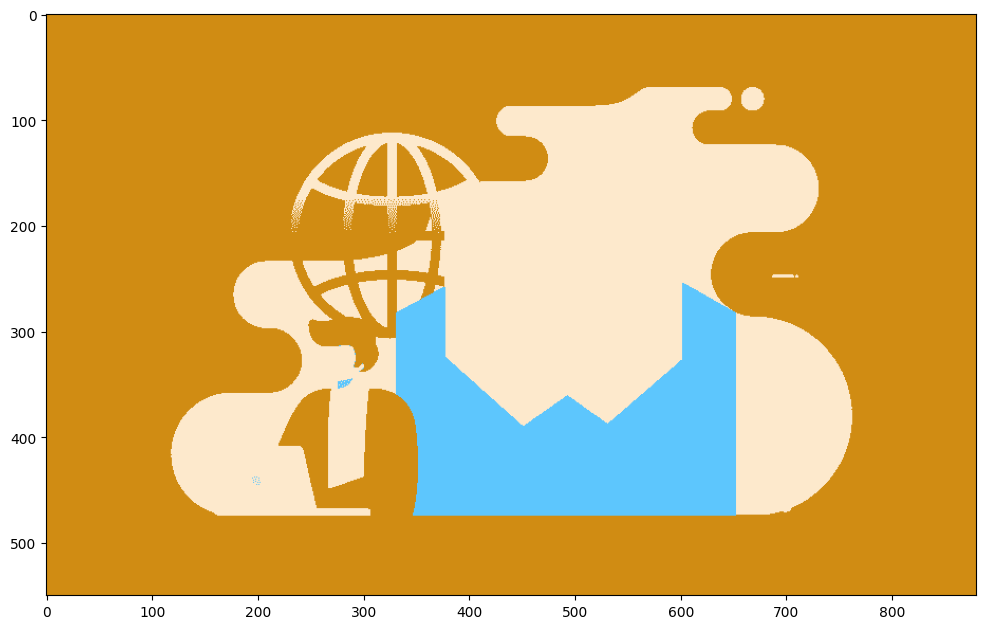

In [18]:
segmented_image =segmented_image.reshape(img.shape)

#show the image
plt.figure(figsize=(12,10))
plt.imshow(segmented_image)
plt.show()

In [19]:
masked_image0=np.copy(img)
masked_image1=np.copy(img)
masked_image2=np.copy(img)

masked_image0=masked_image0.reshape((-1,3))
masked_image1=masked_image1.reshape((-1,3))
masked_image2=masked_image2.reshape((-1,3))

cluster=0

masked_image0[labels==cluster]=[0,0,0]
cluster=1
masked_image1[labels==cluster]=[0,0,0]
cluster=2
masked_image2[labels==cluster]=[0,0,0]

#convert back to original
masked_image0=masked_image0.reshape(img.shape)
masked_image1=masked_image0.reshape(img.shape)
masked_image2=masked_image0.reshape(img.shape)

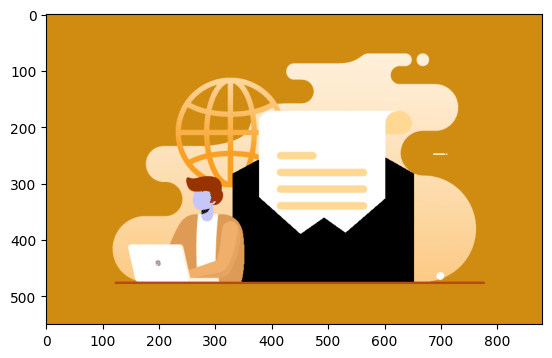

In [20]:
plt.imshow(masked_image0)
plt.show()

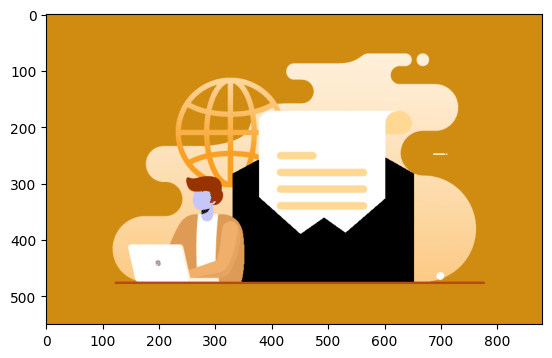

In [21]:
plt.imshow(masked_image1)
plt.show()

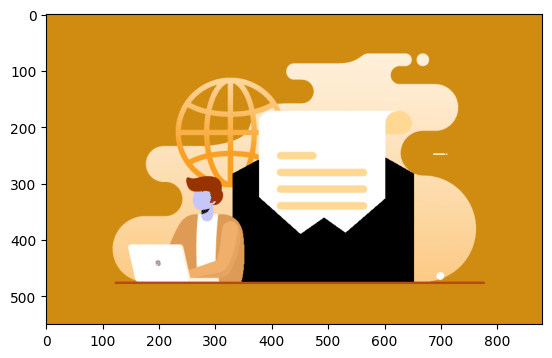

In [22]:
plt.imshow(masked_image2)
plt.show()